# 绘制风场

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: No contour levels were found within the data range.
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


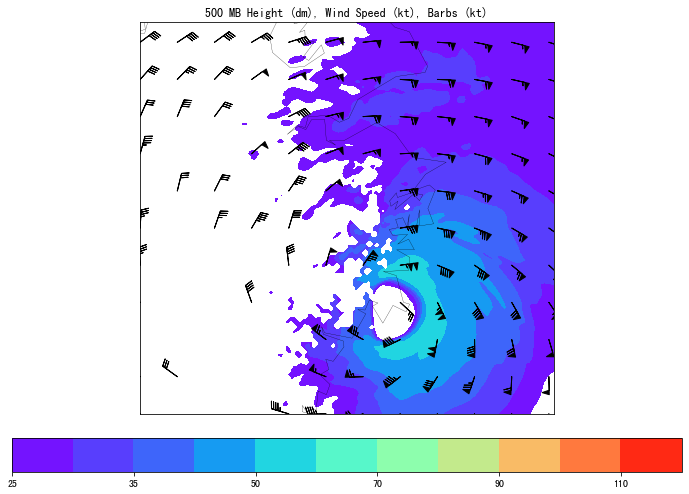

In [8]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

from wrf import getvar, interplevel, to_np, get_basemap, latlon_coords

filepath = "/media/liyuan3970/Data/demo4_run2/"
ncfile =Dataset(filepath+"wrfout_d02_2019-08-09_06:00:00.nc")

# Extract the pressure, geopotential height, and wind variables
p = getvar(ncfile, "pressure", timeidx=88)
z = getvar(ncfile, "z", units="dm", timeidx=88)
ua = getvar(ncfile, "ua", units="kt", timeidx=88)
va = getvar(ncfile, "va", units="kt", timeidx=88)
#wspd = getvar(ncfile, "wspd_wdir", units="kts", timeidx=88)[0,:]
wspd = getvar(ncfile, "wspd_wdir", units="m/s", timeidx=88)[0,:]
# Interpolate geopotential height, u, and v winds to 500 hPa
ht_500 = interplevel(z, p, 925)
u_500 = interplevel(ua, p, 925)
v_500 = interplevel(va, p, 925)
wspd_500 = interplevel(wspd, p, 925)



# Get the lat/lon coordinates
lats, lons = latlon_coords(ht_500)

# Get the basemap object
bm = get_basemap(ht_500)

# Create the figure
fig = plt.figure(figsize=(12,9))
ax = plt.axes()

# Convert the lat/lon coordinates to x/y coordinates in the projection space
x, y = bm(to_np(lons), to_np(lats))

# Add the 500 hPa geopotential height contours
levels = np.arange(520., 580., 6.)
contours = bm.contour(x, y, to_np(ht_500), levels=levels, colors="black")
plt.clabel(contours, inline=1, fontsize=10, fmt="%i")

# Add the wind speed contours
levels = [25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 110, 120]
wspd_contours = bm.contourf(x, y, to_np(wspd_500), levels=levels,
                            cmap=get_cmap("rainbow"))
plt.colorbar(wspd_contours, ax=ax, orientation="horizontal", pad=.05)

# Add the geographic boundaries
bm.drawcoastlines(linewidth=0.25)
bm.drawstates(linewidth=0.25)
bm.drawcountries(linewidth=0.25)

# Add the 500 hPa wind barbs, only plotting every 125th data point.
bm.barbs(x[::15,::15], y[::15,::15], to_np(u_500[::15, ::15]),
         to_np(v_500[::15, ::15]), length=6)

plt.title("500 MB Height (dm), Wind Speed (kt), Barbs (kt)")

plt.show()

